# Baseline Detection

In [2]:
# Imports
import matplotlib.pyplot as plt
import cv2
import numpy as np

IMAGE_PATH = '../test_image.png'

## 1. Detect Points Manualy

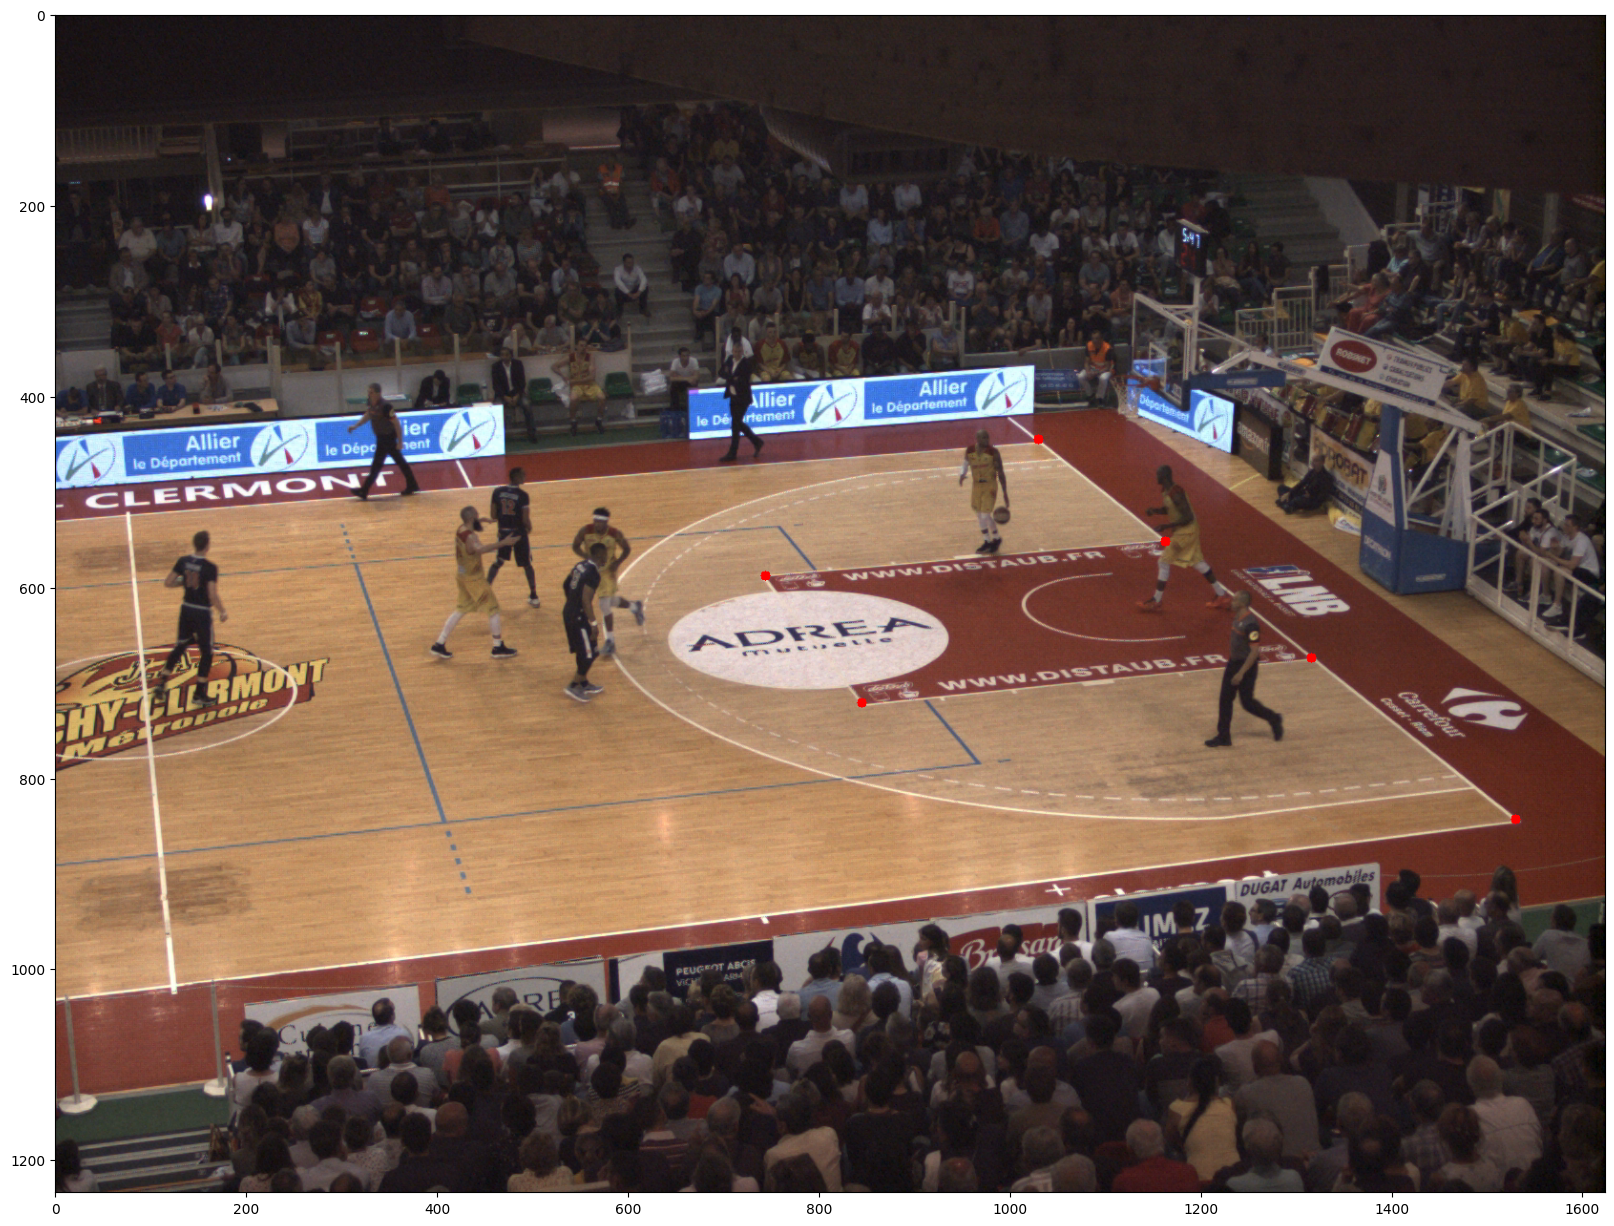

In [4]:
# Load your image
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define your six selected points manually for 'test_image.png'
selected_points = np.array([
    [1030, 445],  # Point 0
    [1163, 552],  # Point 1
    [744, 588],  # Point 2
    [845, 721],  # Point 3
    [1316, 674],   # Point 4
    [1530, 843],  # Point 5
], dtype=np.float32)

# Display the selected points on the image
for pt in selected_points:
    cv2.circle(image, tuple(pt.astype(int)), 5, (255, 0, 0), -1)

plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.show()

## 2. Compute Intersections

In [5]:
# Function to compute line equation Ax + By + C = 0
def line_equation(p1, p2):
    A = p2[1] - p1[1]  # Difference in y
    B = p1[0] - p2[0]  # Difference in x
    C = p2[0] * p1[1] - p1[0] * p2[1]  # Determinant
    return A, B, C


# Function to compute the intersection of two lines
def line_intersection(line1, line2):
    A1, B1, C1 = line1
    A2, B2, C2 = line2
    det = A1 * B2 - A2 * B1
    if det == 0:  # Parallel lines
        return None
    x = (B1 * C2 - B2 * C1) / det
    y = (A2 * C1 - A1 * C2) / det
    return (int(x), int(y))


# Compute additional 4 intersection points (blue points)
# Define the main court lines based on selected points
lines = [
    (selected_points[0], selected_points[1]),  # Line P0-P1
    (selected_points[2], selected_points[3]),  # Line P2-P3
    (selected_points[4], selected_points[5]),  # Line P4-P5
    # Add other relevant lines here
]

# Compute their intersections
intersections = []
for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        line1 = line_equation(lines[i][0], lines[i][1])
        line2 = line_equation(lines[j][0], lines[j][1])
        intersection = line_intersection(line1, line2)
        if intersection:
            intersections.append(intersection)

# Keep only 4 intersections for P12-P15
intersections = np.array(intersections[:4])  # Ensure only 4 are stored

# Combine all 16 points
final_points = np.vstack((selected_points, intersections))

# Print final points
for i, pt in enumerate(final_points):
    print(f"P{i}: {pt}")

P0: [1030.  445.]
P1: [1163.  552.]
P2: [744. 588.]
P3: [845. 721.]
P4: [1316.  674.]
P5: [1530.  843.]
P6: [  15. -370.]
P7: [1242.  615.]
P8: [  50. -325.]


## 3. Display Points

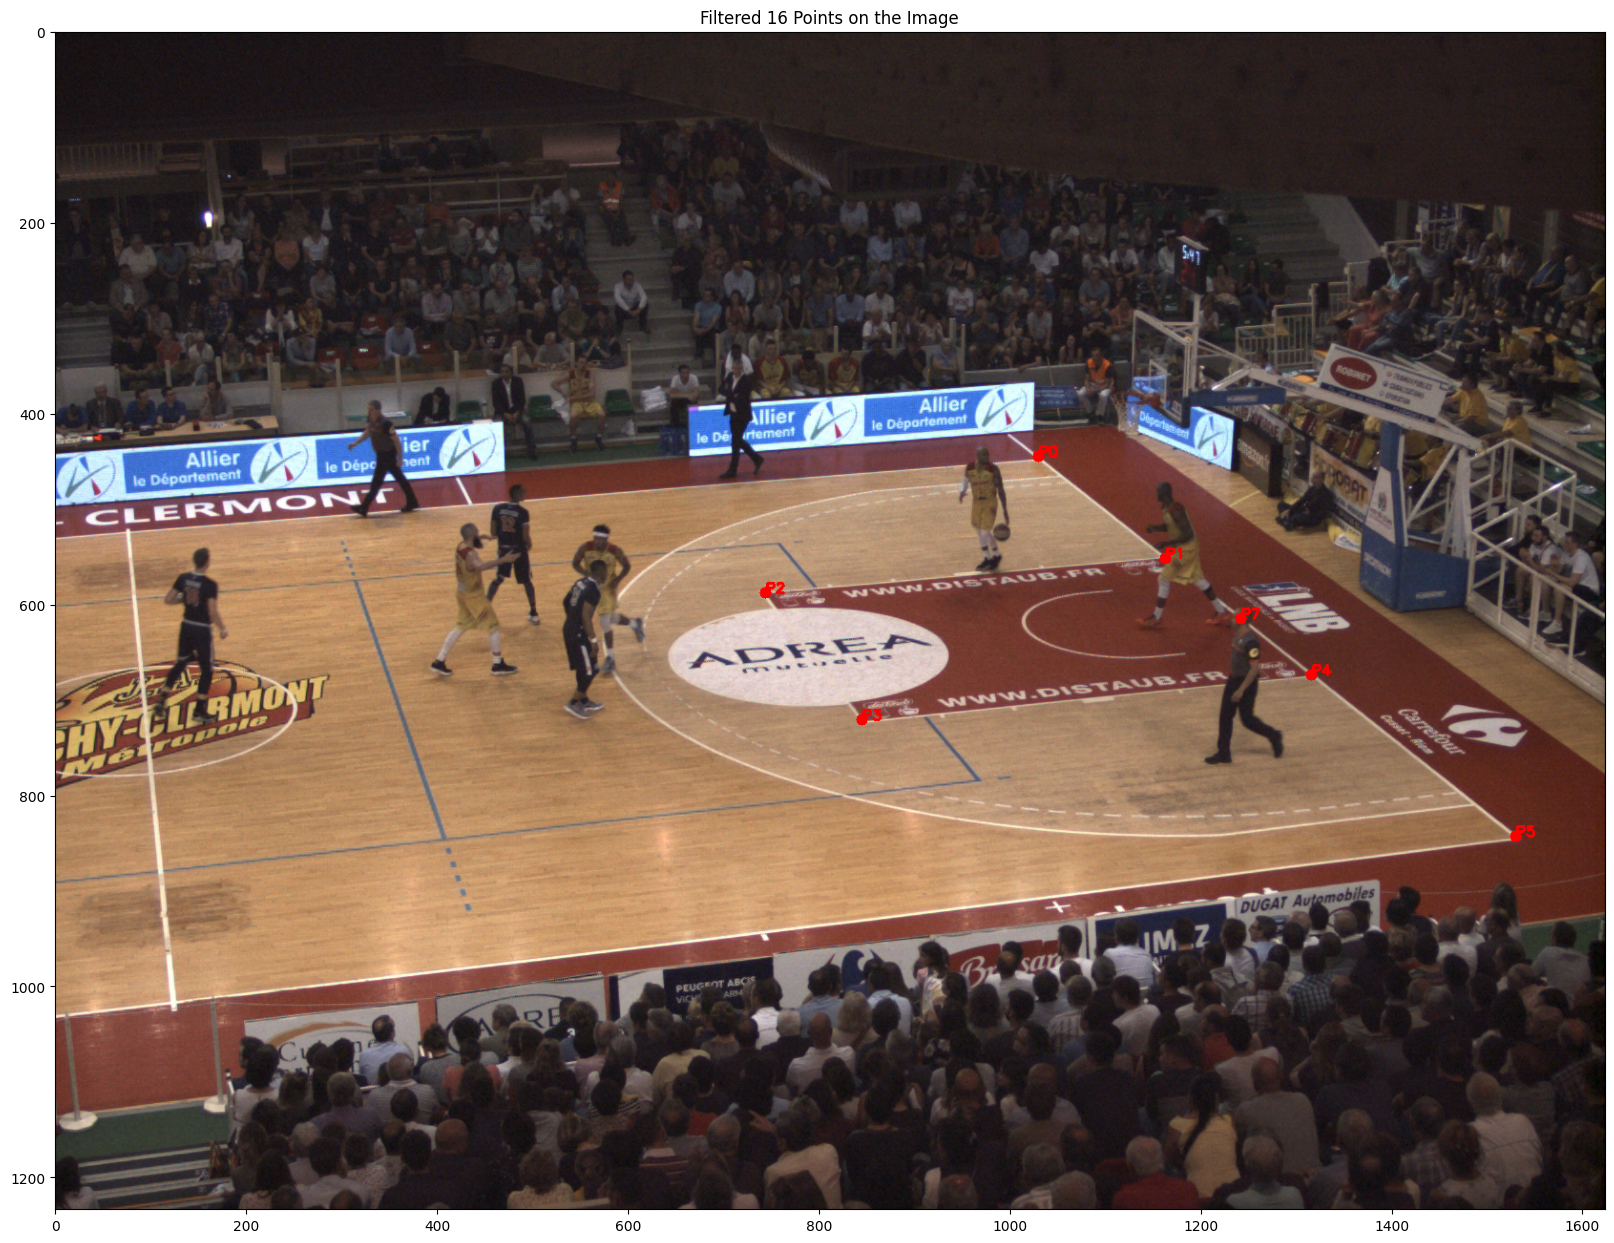

In [7]:
# Draw only the 16 reference points
image_with_points = image.copy()

for i, pt in enumerate(final_points):
    color = (255, 0, 0) if i < 12 else (0, 0, 255)  # Blue for P12-P15
    cv2.circle(image_with_points, tuple(pt.astype(int)), 6, color, -1)
    cv2.putText(image_with_points, f"P{i}", tuple(pt.astype(int)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(20, 20))
plt.imshow(image_with_points)
plt.title("Filtered 16 Points on the Image")
plt.show()
